Unzip file

# Dataset
https://www.kaggle.com/competitions/digit-recognizer/data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/Basic of Neural Network/digit-recognizer.zip'

Archive:  /content/drive/MyDrive/Basic of Neural Network/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

aapproch
1. load the libraries and data
2. visualize the data
3. divide the data intoX(Images) and Y(Labels)
4. Divide the train data into train and test
5. Apply DT and Random statement
6. Evaluate the Dtree and RF model
7. Apply single layer perception
8. Evaluate the SLP
9. Compare the results between ML (Dtree and RF)
10. Draw conclusion

1. Load data

In [4]:
train = pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
"""parse matrix
sparsity is big issue"""

'parse matrix\nsparsity is big issue'

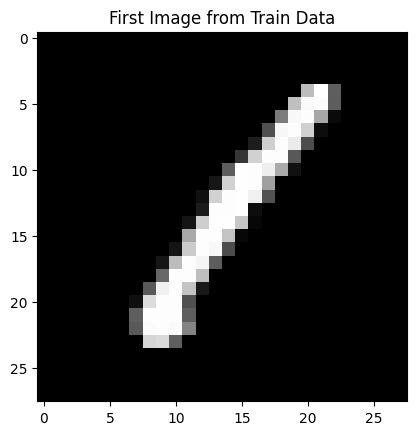

In [7]:
# Extract pixel values for the first image
first_image_pixels = train.iloc[0, 1:].values  # Exclude the label column (first column)

# Reshape the pixel values into a 28x28 image
image = first_image_pixels.reshape(28, 28)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('First Image from Train Data')
plt.show()

# You can also print the pixel values if needed:
# print(first_image_pixels)

In [8]:
train.shape

(42000, 785)

In [9]:
y=train["label"]
print(y.shape)

(42000,)


In [10]:
x=train.drop("label",axis=1)
print(x.shape)

(42000, 784)


In [11]:
x.skew()

,0
pixel0,0.000000
pixel1,0.000000
pixel2,0.000000
pixel3,0.000000
pixel4,0.000000
...,...
pixel779,145.149671
pixel780,0.000000
pixel781,0.000000
pixel782,0.000000


Divide data in to train and test

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)
print(f"x train {x_train.shape}")
print(f"x test {x_test.shape}")
print(f"y train {y_train.shape}")
print(f"y train {y_test.shape}")

x train (33600, 784)
x test (8400, 784)
y train (33600,)
y train (8400,)


decision tree
random forest
grid search

1. Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [14]:
acc=[]

In [15]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)
y_log_pr=logistic_model.predict(x_test)
acc.append(accuracy_score(y_test,y_log_pr))

In [16]:
acc

[0.9142857142857143]

2. Decision Tree Classification

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [18]:
dtc_model=DecisionTreeClassifier()
dtc_model.fit(x_train,y_train)
y_dtc_pr=dtc_model.predict(x_test)
acc.append(accuracy_score(y_test,y_dtc_pr))

In [19]:
acc

[0.9142857142857143, 0.8596428571428572]

3. Random Forest Regressor


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [21]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_rf_pr=rf_model.predict(x_test)
acc.append(accuracy_score(y_test,y_rf_pr))

In [22]:
acc

[0.9142857142857143, 0.8596428571428572, 0.9639285714285715]

In [23]:
# param_grid={
#    "n_estimators":[100,200,300,400,500],
#    "max_depth":[10,20,30,40.50],
#    "min_samples_split":[20,30,40,50,60],
#    "min_samples_leaf":[2,4,6,8,10,12]
# }

In [24]:
# from sklearn.model_selection import GridSearchCV
# grid_search=GridSearchCV(estimator=rf_model,param_grid=param_grid,n_jobs=-1)
# grid_search.fit(x_train,y_train)
# best_param=grid_search.best_params_
# best_model=grid_search.best_estimator_
# print(best_param)
# print(best_model)

Navies Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
navies_model= GaussianNB()

In [26]:
navies_model.fit(x_train,y_train)
y_pred_nb=navies_model.predict(x_test)
acc.append(accuracy_score(y_test,y_pred_nb))

In [27]:
acc

[0.9142857142857143,
 0.8596428571428572,
 0.9639285714285715,
 0.5497619047619048]

In [28]:
def model_evaluation(model, x_train, y_train, x_test, y_test):
    y_hat_train = model.predict(x_train)
    y_hat_test = model.predict(x_test)

    print("Training Data:")
    print(classification_report(y_train, y_hat_train))
    print(confusion_matrix(y_train, y_hat_train))
    print(f"Accuracy Score: {accuracy_score(y_train, y_hat_train)}")

    print("\nTesting Data:")
    print(classification_report(y_test, y_hat_test))
    print(confusion_matrix(y_test, y_hat_test))
    print(f"Accuracy Score: {accuracy_score(y_test, y_hat_test)}")

# Example usage (replace with your actual model and data)
model_evaluation(rf_model, x_train, y_train, x_test, y_test)

Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3279
           1       1.00      1.00      1.00      3760
           2       1.00      1.00      1.00      3320
           3       1.00      1.00      1.00      3472
           4       1.00      1.00      1.00      3262
           5       1.00      1.00      1.00      3051
           6       1.00      1.00      1.00      3300
           7       1.00      1.00      1.00      3543
           8       1.00      1.00      1.00      3272
           9       1.00      1.00      1.00      3341

    accuracy                           1.00     33600
   macro avg       1.00      1.00      1.00     33600
weighted avg       1.00      1.00      1.00     33600

[[3279    0    0    0    0    0    0    0    0    0]
 [   0 3760    0    0    0    0    0    0    0    0]
 [   0    0 3320    0    0    0    0    0    0    0]
 [   0    0    0 3472    0    0    0    0    0    0]
 [   0    0   

# Single Layer Perceptron (Single Neuron)

In [29]:
per = Perceptron(verbose = 2,random_state=123)
per.fit(x_train, y_train)
y_hat_train_per = per.predict(x_train)
y_hat_test_per = per.predict(x_test)

-- Epoch 1
Norm: 34637.94, NNZs: 607, Bias: -90.000000, T: 33600, Avg. loss: 48395.747768
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 41825.28, NNZs: 618, Bias: -151.000000, T: 67200, Avg. loss: 40090.612708
Total training time: 0.12 seconds.
-- Epoch 3
Norm: 48393.07, NNZs: 621, Bias: -212.000000, T: 100800, Avg. loss: 39643.426429
Total training time: 0.18 seconds.
-- Epoch 4
Norm: 54024.41, NNZs: 625, Bias: -275.000000, T: 134400, Avg. loss: 38581.834911
Total training time: 0.24 seconds.
-- Epoch 5
Norm: 56698.46, NNZs: 626, Bias: -323.000000, T: 168000, Avg. loss: 36739.054762
Total training time: 0.31 seconds.
-- Epoch 6
Norm: 60821.16, NNZs: 626, Bias: -376.000000, T: 201600, Avg. loss: 35937.408810
Total training time: 0.37 seconds.
-- Epoch 7
Norm: 64127.84, NNZs: 629, Bias: -434.000000, T: 235200, Avg. loss: 36095.758750
Total training time: 0.42 seconds.
-- Epoch 8
Norm: 68767.20, NNZs: 629, Bias: -493.000000, T: 268800, Avg. loss: 36200.006458
Total training time: 0

In [30]:
print(per.n_iter_)

22


In [31]:
per.coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
per.coef_[0]

array([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00, -4.0000e+01, -3.8000e+02,
       -2.1200e+02,  0.0000e+00, -5.5000e+01,  8.7500e+02,  3.1630e+03,
        1.7610e+03,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  2.9000e+01,
        1.0000e+01,  0.0000e+00, -7.3000e+01, -5.7800e+02, -1.9330e+03,
       -3.4730e+03, -2.6090e+03, -5.6540e+03, -5.6230e+03, -3.99

In [33]:
print(per.coef_.shape)

(10, 784)


In [34]:
print(per.intercept_.shape)

(10,)


In [35]:
model_evaluation(per, x_train, y_train, x_test, y_test)

Training Data:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3279
           1       0.98      0.96      0.97      3760
           2       0.92      0.88      0.90      3320
           3       0.87      0.89      0.88      3472
           4       0.97      0.83      0.89      3262
           5       0.77      0.88      0.82      3051
           6       0.96      0.94      0.95      3300
           7       0.92      0.93      0.92      3543
           8       0.86      0.77      0.81      3272
           9       0.79      0.92      0.85      3341

    accuracy                           0.90     33600
   macro avg       0.90      0.90      0.90     33600
weighted avg       0.90      0.90      0.90     33600

[[3158    1    8   19    4   35   24    2   11   17]
 [   0 3622   13   33    2   28    3   19   26   14]
 [  10   19 2925  124   26   50   24   50   76   16]
 [   2    2   79 3100    2  123    6   29   82   47]
 [   3    8   

MultiLayer Perceptron using TensorFlow
* Tensor --> n d array


Approach to Keras Model
1. Declare a Model
   1. Sequential Model: Sequence of layers
   2. Functional Model: Models with inter connected outputs
2. Declare the layers
   1. Type of Layer (Dense, Conv Layer, RNN, LSTM....)
   2. Number of neurons (32, 64, 128, 256, 512)
   3. Activation function (Relu, Sigmoid, Softmax, Tanh)
3. Compile the layers
   1. Loss Function (Binary Cross Entropy, Categorical Cross Entropy...)
   2. Optimizer (SGD, Adam, AdaGrad....)
   3. Metrics (Accuracy Score, Precision, Recall)
4. Fit the model
   1. input and output (x_train, y_train)
   2. Number of Iterations (20, 40, 50, 100, 200)
   3. Validation dataset (x_test, y_test)
5. Model Evaluation
   1. Classification: Precision, Recall, Classification Report
   2. Regression: MSE, RMSE, R2 score

In [36]:
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam

1. Declare the model and layers

In [37]:
model = Sequential()
#Declare the input Layer
model.add(Dense(64,activation="relu",input_dim=(784)))
# Hiddin Layer 1
model.add(Dense(64,activation="relu"))
# hidden layer 2
model.add(Dense(64,activation="relu"))
# output layer
model.add(Dense(10,activation="softmax"))

Compile the layers

In [ ]:
#model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [38]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [39]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [40]:
hist = model.fit(x_train, y_train, epochs = 50, validation_data=(x_test, y_test))

Epoch 1/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6757 - loss: 4.4729 - val_accuracy: 0.8826 - val_loss: 0.4899
Epoch 2/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8944 - loss: 0.4059 - val_accuracy: 0.9037 - val_loss: 0.3481
Epoch 3/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9194 - loss: 0.2955 - val_accuracy: 0.9212 - val_loss: 0.2923
Epoch 4/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9337 - loss: 0.2466 - val_accuracy: 0.9271 - val_loss: 0.2793
Epoch 5/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9412 - loss: 0.2137 - val_accuracy: 0.9236 - val_loss: 0.2781
Epoch 6/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9482 - loss: 0.1792 - val_accuracy: 0.9411 - val_loss: 0.2112
Epoch 7/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9532 - loss: 0.1640 - val_accuracy: 0.9444 - val_loss: 0.2045
Epoch 8/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9587 - loss: 0.1407 - 

# Multi Layer Neural Network

In [41]:
model = Sequential()
#Declare the input Layer
model.add(Dense(250,activation="relu",input_dim=(784)))
# Hiddin Layer 1
model.add(Dense(250,activation="relu"))
# hidden layer 2
model.add(Dense(250,activation="relu"))
# output layer
model.add(Dense(10,activation="softmax"))

In [42]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [43]:
hist = model.fit(x_train, y_train, epochs = 100, validation_data=(x_test, y_test))

Epoch 1/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8038 - loss: 3.9386 - val_accuracy: 0.9204 - val_loss: 0.3365
Epoch 2/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9355 - loss: 0.2586 - val_accuracy: 0.9321 - val_loss: 0.2591
Epoch 3/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9525 - loss: 0.1701 - val_accuracy: 0.9467 - val_loss: 0.2238
Epoch 4/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9579 - loss: 0.1477 - val_accuracy: 0.9563 - val_loss: 0.1814
Epoch 5/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9642 - loss: 0.1311 - val_accuracy: 0.9544 - val_loss: 0.1935
Epoch 6/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9695 - loss: 0.1071 - val_accuracy: 0.9600 - val_loss: 0.1548
Epoch 7/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9731 - loss: 0.0975 - val_accuracy: 0.9515 - val_loss: 0.1981
Epoch 8/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9713 - los

Discussion here in this notebook we studies Machine learning random forest algorithum , Linear Perceptron and Decide and study multilayer neural network with different activation function

In [44]:
hist = model.fit(x_train, y_train, epochs = 150, validation_data=(x_test, y_test))

Epoch 1/150
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9936 - loss: 0.0460 - val_accuracy: 0.9676 - val_loss: 0.6473
Epoch 2/150
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9957 - loss: 0.0287 - val_accuracy: 0.9700 - val_loss: 0.8840
Epoch 3/150
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9957 - loss: 0.0225 - val_accuracy: 0.9664 - val_loss: 0.7317
Epoch 4/150
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9920 - loss: 0.0510 - val_accuracy: 0.9700 - val_loss: 0.7362
Epoch 5/150
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9849 - loss: 0.0725 - val_accuracy: 0.9662 - val_loss: 0.6899
Epoch 6/150
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9929 - loss: 0.0482 - val_accuracy: 0.9632 - val_loss: 0.6131
Epoch 7/150
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9916 - loss: 0.0458 - val_accuracy: 0.9675 - val_loss: 0.9881
Epoch 8/150
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9913 - l